Airbnb Hotel Booking Analysis

VOIS Project - Data Analysis and Insights

Airbnb listings often show wide variations in pricing across neighborhoods, property types, and host characteristics. These inconsistencies make it difficult for hosts to set competitive yet profitable prices, while also creating uncertainty for guests about whether they are paying a fair rate.

The problem is to analyze how factors such as location, property type, host verification, reviews, and availability influence the price of Airbnb listings. By uncovering these patterns, the study will help identify pricing trends and provide data-driven recommendations for hosts to optimize their pricing strategy while ensuring affordability for guests

Research Questions

This project aims to uncover insights from the Airbnb Open Data by answering:



1.   What are the different property types in the Dataset?
2.   Which neighborhood group has the highest number of listings?


1.   Which neighborhoods group have the highest average prices for Airbnb listings?
2.   Is there a relationship between the construction year of property and price?


1.   Who are the top 10 hosts by calculated host listing count?
2.  Are hosts with verified identities more likely to receive positive reviews?


















1.   Is there a correlation between the price of a listing and its service fee?
2.   What is the average review rate number (e.g., stars) for listings, and does it vary based on neighborhood group and room type?



1.  Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?





DATA loading

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

In [7]:
print(f"📊 Dataset shape: {df.shape}")

📊 Dataset shape: (102599, 26)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [10]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


DATA CLEANING

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365              

In [12]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 541


In [13]:
# Clean and standardize column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
print("Standardized column names:")
print(df.columns)

Standardized column names:
Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [ ]:
ANALYSIS:
question 1:What are the different property types in the Dataseť?


Different property types and their counts:
room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


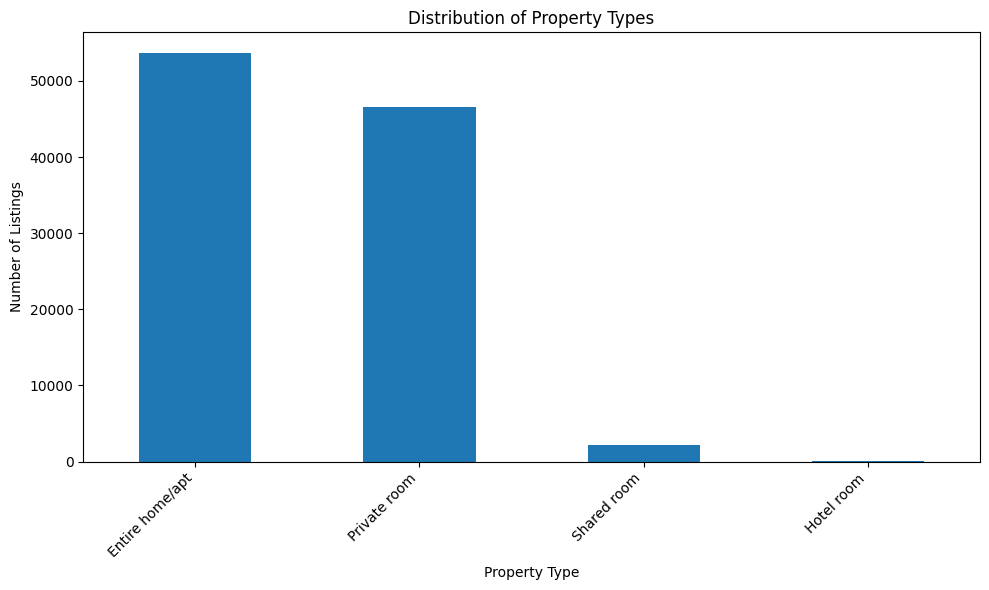

In [14]:
# Research Question 1: What are the different property types in the dataset?
property_types = df['room_type'].value_counts()
print("Different property types and their counts:")
print(property_types)

# Plotting the property types
plt.figure(figsize=(10, 6))
property_types.plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

queston 2:Which neighborhood group has the highest number of listings?


Number of listings per neighborhood group:
neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

Neighborhood group with the highest number of listings: Manhattan (43792 listings)


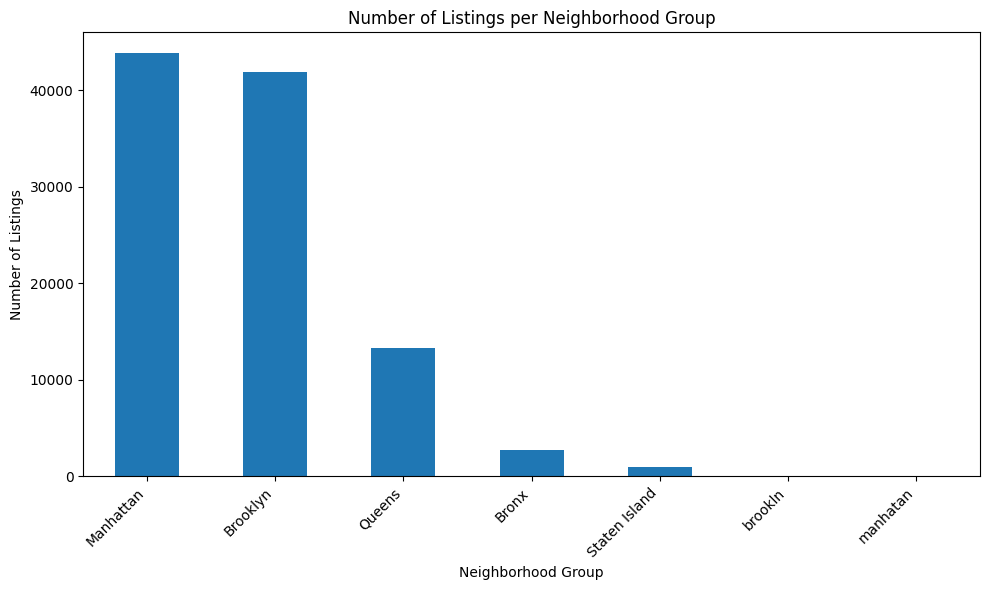

In [15]:
# Research Question 2: Which neighborhood group has the highest number of listings?
neighbourhood_counts = df['neighbourhood_group'].value_counts()
print("Number of listings per neighborhood group:")
print(neighbourhood_counts)

most_listings_neighbourhood = neighbourhood_counts.index[0]
highest_count = neighbourhood_counts.iloc[0]

print(f"\nNeighborhood group with the highest number of listings: {most_listings_neighbourhood} ({highest_count} listings)")

# Plotting the number of listings per neighborhood group
plt.figure(figsize=(10, 6))
neighbourhood_counts.plot(kind='bar')
plt.title('Number of Listings per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

question 3: Which neighborhoods group have the highest average prices for Airbnb listings?


Average price per neighborhood group:
neighbourhood_group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.561078
Staten Island    624.490546
Manhattan        622.440227
manhatan         460.000000
Name: price, dtype: float64


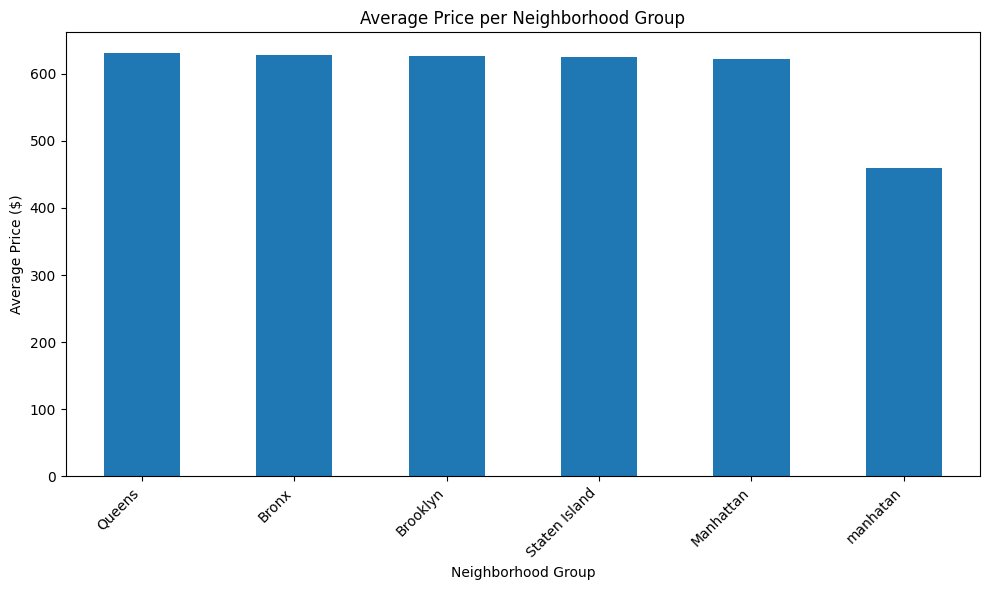

In [22]:
# Research Question 3: Which neighborhood group has the highest average prices for Airbnb listings?
average_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("Average price per neighborhood group:")
print(average_price_by_neighbourhood)

highest_average_price_neighbourhood = average_price_by_neighbourhood.index[0]
highest_average_price = average_price_by_neighbourhood.iloc[0]

# Plotting the average price per neighborhood group
plt.figure(figsize=(10, 6))
average_price_by_neighbourhood.plot(kind='bar')
plt.title('Average Price per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

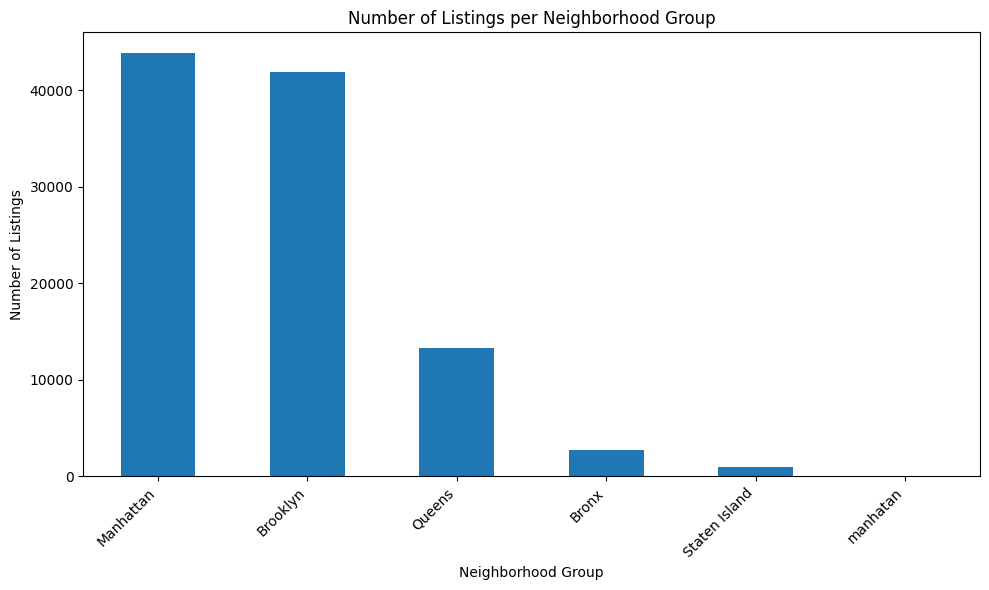

In [21]:
# Plotting the number of listings per neighborhood group
neighbourhood_counts = df['neighbourhood_group'].value_counts()

plt.figure(figsize=(10, 6))
neighbourhood_counts.plot(kind='bar')
plt.title('Number of Listings per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Correct the typo in 'neighbourhood_group'
df['neighbourhood_group'] = df['neighbourhood_group'].replace('brookln', 'Brooklyn')

# Verify the change
print("Updated counts for 'neighbourhood_group':")
print(df['neighbourhood_group'].value_counts())

Updated counts for 'neighbourhood_group':
neighbourhood_group
Manhattan        43792
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
manhatan             1
Name: count, dtype: int64


question 4:Is there a relationship between the construction year of property and price?

In [23]:
# Convert 'id' and 'host_id' to object type
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)

# Convert 'construction_year' to integer, handling missing values
# We'll use errors='coerce' to turn unparseable values into NaN, then fill NaN or drop them later if necessary
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce').astype('Int64') # Using 'Int64' to allow for NaNs

# Ensure 'last_review' is datetime (it already is based on info(), but good practice)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Verify the data types
print("Updated data types:")
print(df.dtypes)

Updated data types:
id                                        object
name                                      object
host_id                                   object
host_identity_verified                    object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country_code                              object
instant_bookable                         float64
cancellation_policy                       object
room_type                                 object
construction_year                          Int64
price                                    float64
service_fee                              float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]


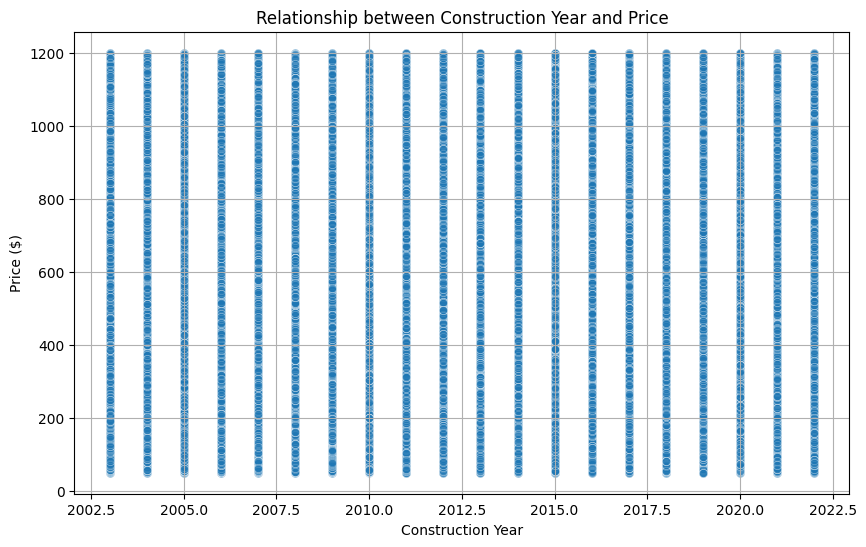

In [24]:
# Research Question 4: Is there a relationship between the construction year of property and price?

# Drop rows with missing values in 'construction_year' or 'price' for this analysis
df_cleaned = df.dropna(subset=['construction_year', 'price']).copy()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='construction_year', y='price', alpha=0.5)
plt.title('Relationship between Construction Year and Price')
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

question 5: Who are the top 10 hosts by calculated host listing count?


Top 10 Hosts by Calculated Host Listing Count:


,host_id,host_name,calculated_host_listings_count,neighbourhood_group,room_type
64244,695353567,Blueground,332.0,Manhattan,Entire home/apt
66258,59913507223,Blueground,332.0,Manhattan,Entire home/apt
57898,44375550153,Blueground,332.0,Manhattan,Entire home/apt
66155,80832323346,Blueground,332.0,Manhattan,Entire home/apt
64991,26125388039,Blueground,332.0,Manhattan,Entire home/apt
67152,83842788941,Blueground,332.0,Manhattan,Entire home/apt
64894,52360647654,Blueground,332.0,Manhattan,Entire home/apt
65271,3405726007,Blueground,332.0,Manhattan,Entire home/apt
66185,70352033029,Blueground,332.0,Manhattan,Entire home/apt
62920,6866703084,Blueground,332.0,Manhattan,Entire home/apt


/tmp/ipython-input-880284191.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_hosts_by_listing_count, x='host_name', y='calculated_host_listings_count', palette='viridis')


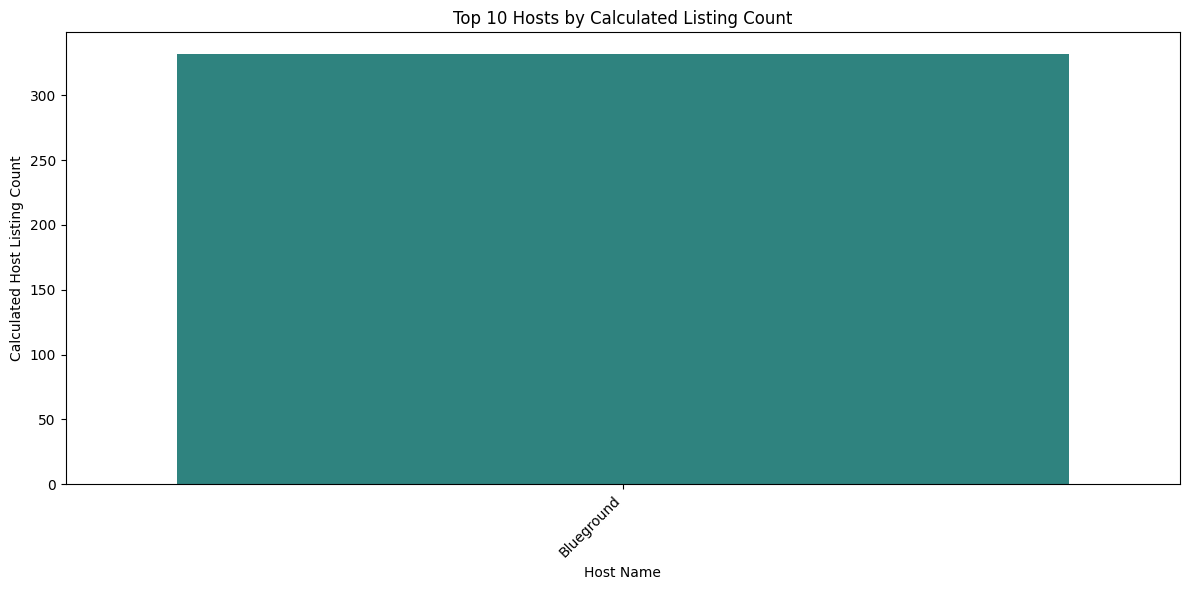

In [25]:
# Research Question 5: Who are the top 10 hosts by calculated host listing count?

# Sort by 'calculated_host_listings_count' in descending order and get the top 10
top_10_hosts_by_listing_count = df.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

# Display relevant columns for these top hosts
print("Top 10 Hosts by Calculated Host Listing Count:")
display(top_10_hosts_by_listing_count[['host_id', 'host_name', 'calculated_host_listings_count', 'neighbourhood_group', 'room_type']])

# Plotting the top 10 hosts by listing count
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_hosts_by_listing_count, x='host_name', y='calculated_host_listings_count', palette='viridis')
plt.title('Top 10 Hosts by Calculated Listing Count')
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listing Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Hosts by Actual Listing Count in this Dataset:


,host_id,actual_listing_count,host_name
0,862834181,2,Akili
1,70834921655,2,Celine
2,65519636966,2,Dee
3,635525656,2,Priscilla
4,32812127929,2,Sufia
5,11710356637,2,Michelle
6,90549798737,2,Ephraim
7,26969548045,2,Juan
8,32202051101,2,Chun Kit
9,17911408018,2,Lena


/tmp/ipython-input-1395614798.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_hosts_with_counts, x='host_name', y='actual_listing_count', palette='viridis')


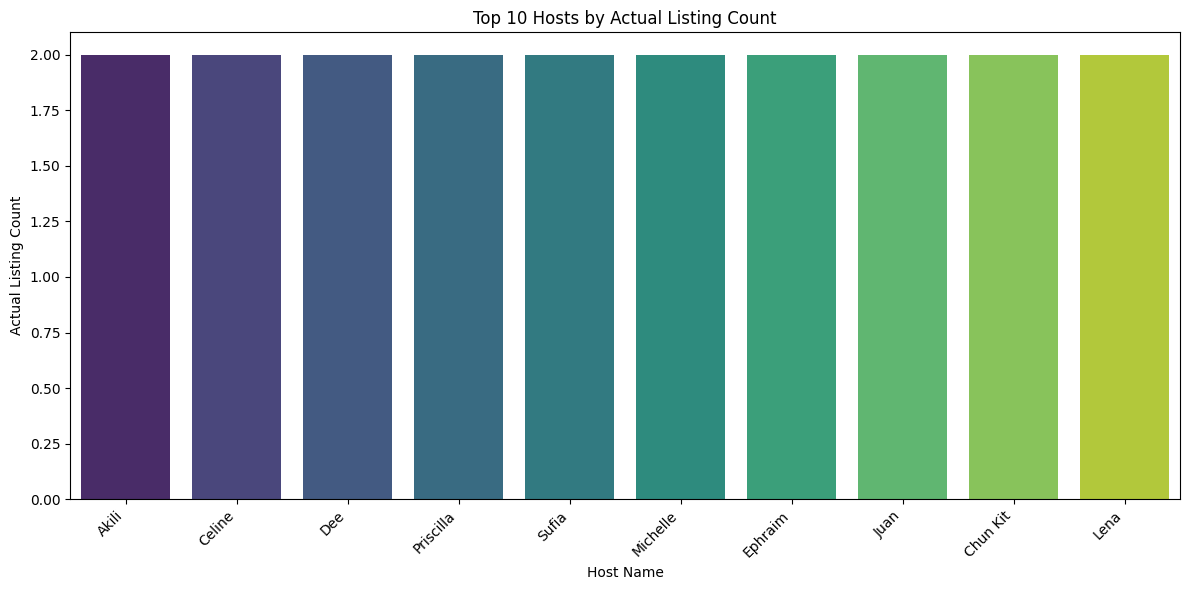

In [26]:
# Calculate the actual listing count per host from the dataset
actual_listing_counts = df['host_id'].value_counts()

# Get the host_ids of the top 10 hosts by actual listing count
top_10_host_ids = actual_listing_counts.head(10).index

# Filter the original DataFrame to get listings for these top 10 hosts
# Need to handle the case where a host_id might appear multiple times in the top_10_host_ids if
# we grouped by host_name before. Grouping by host_id is more accurate for unique hosts.
top_10_hosts_by_actual_count_df = df[df['host_id'].isin(top_10_host_ids)].copy()

# Get unique host information for the top 10 hosts
top_10_hosts_info = top_10_hosts_by_actual_count_df[['host_id', 'host_name']].drop_duplicates()

# Combine with the actual counts
top_10_hosts_with_counts = pd.DataFrame({
    'host_id': top_10_host_ids,
    'actual_listing_count': actual_listing_counts.head(10).values
}).merge(top_10_hosts_info, on='host_id', how='left')

print("Top 10 Hosts by Actual Listing Count in this Dataset:")
display(top_10_hosts_with_counts)

# Optional: Plotting the top 10 hosts by actual listing count
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_hosts_with_counts, x='host_name', y='actual_listing_count', palette='viridis')
plt.title('Top 10 Hosts by Actual Listing Count')
plt.xlabel('Host Name')
plt.ylabel('Actual Listing Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

quesrion 6: Are hosts with verified identities more likely to receive positive reviews

Distribution of Host Identity Verified:
host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64

Distribution of Review Rate Number:
review_rate_number
1.0     9212
2.0    23098
3.0    23265
4.0    23329
5.0    23369
Name: count, dtype: int64

Average Review Rate by Host Identity Verification Status:
host_identity_verified
unconfirmed    3.271767
verified       3.286684
Name: review_rate_number, dtype: float64

Average Number of Reviews by Host Identity Verification Status:
host_identity_verified
unconfirmed    27.541759
verified       27.319199
Name: number_of_reviews, dtype: float64


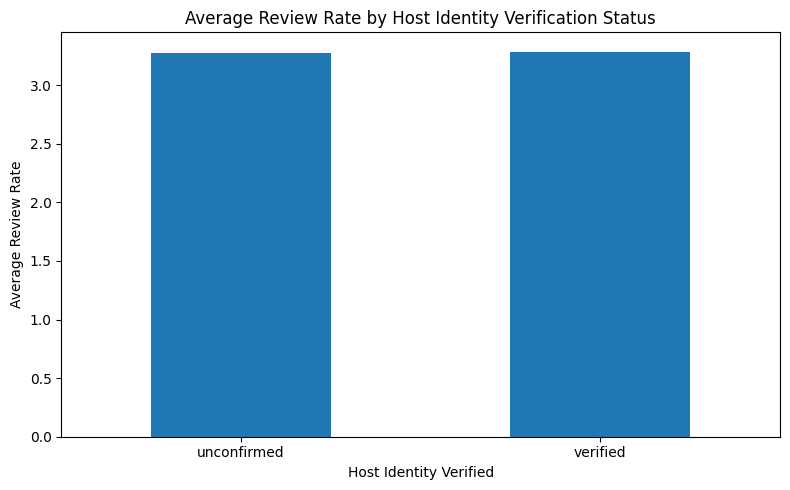

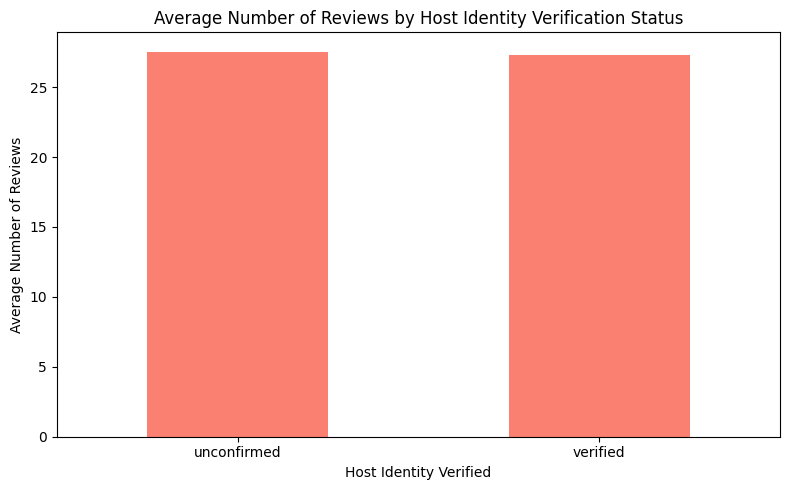

In [27]:
# Research Question 6: Are hosts with verified identities more likely to receive positive reviews?

# First, let's look at the distribution of 'host_identity_verified' and 'review_rate_number'
print("Distribution of Host Identity Verified:")
print(df['host_identity_verified'].value_counts())

print("\nDistribution of Review Rate Number:")
print(df['review_rate_number'].value_counts().sort_index())

# We can compare the average review rate for verified vs. unconfirmed hosts
average_review_rate_by_verification = df.groupby('host_identity_verified')['review_rate_number'].mean()

print("\nAverage Review Rate by Host Identity Verification Status:")
print(average_review_rate_by_verification)

# We can also compare the average number of reviews
average_number_of_reviews_by_verification = df.groupby('host_identity_verified')['number_of_reviews'].mean()

print("\nAverage Number of Reviews by Host Identity Verification Status:")
print(average_number_of_reviews_by_verification)

# Plotting the average review rate
plt.figure(figsize=(8, 5))
average_review_rate_by_verification.plot(kind='bar')
plt.title('Average Review Rate by Host Identity Verification Status')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting the average number of reviews
plt.figure(figsize=(8, 5))
average_number_of_reviews_by_verification.plot(kind='bar', color='salmon')
plt.title('Average Number of Reviews by Host Identity Verification Status')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

question 7:Is there a correlation between the price of a listing and its service fee?


Correlation between Price and Service Fee: 1.00


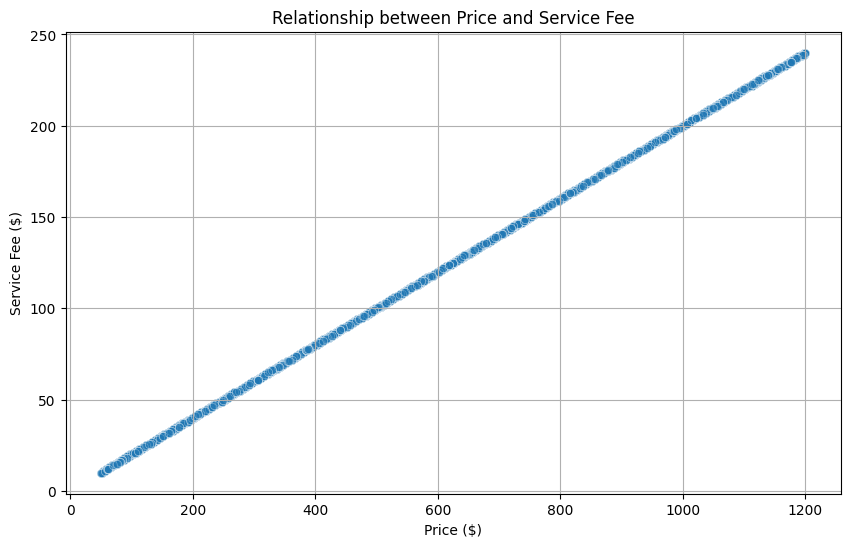

In [28]:
# Research Question 7: Is there a correlation between the price of a listing and its service fee?

# Drop rows with missing values in 'price' or 'service_fee' for this analysis
df_cleaned_corr = df.dropna(subset=['price', 'service_fee']).copy()

# Calculate the correlation coefficient
correlation = df_cleaned_corr['price'].corr(df_cleaned_corr['service_fee'])
print(f"Correlation between Price and Service Fee: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned_corr, x='price', y='service_fee', alpha=0.5)
plt.title('Relationship between Price and Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.grid(True)
plt.show()

question 8:What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?


Overall Average Review Rate: 3.28

Average Review Rate by Neighborhood Group:
neighbourhood_group
Staten Island    3.405690
Bronx            3.333210
Queens           3.330587
Manhattan        3.276599
Brooklyn         3.259077
manhatan         3.000000
Name: review_rate_number, dtype: float64

Average Review Rate by Room Type:
room_type
Hotel room         3.534483
Shared room        3.308698
Private room       3.281899
Entire home/apt    3.274906
Name: review_rate_number, dtype: float64

Average Review Rate by Neighborhood Group and Room Type:


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,3.346457,NaN,3.329706,3.264957
Brooklyn,3.250378,3.75,3.264501,3.336983
Manhattan,3.275807,3.50,3.277576,3.257459
Queens,3.349154,3.75,3.315585,3.377778
Staten Island,3.329087,NaN,3.479482,3.533333
manhatan,NaN,NaN,3.000000,NaN


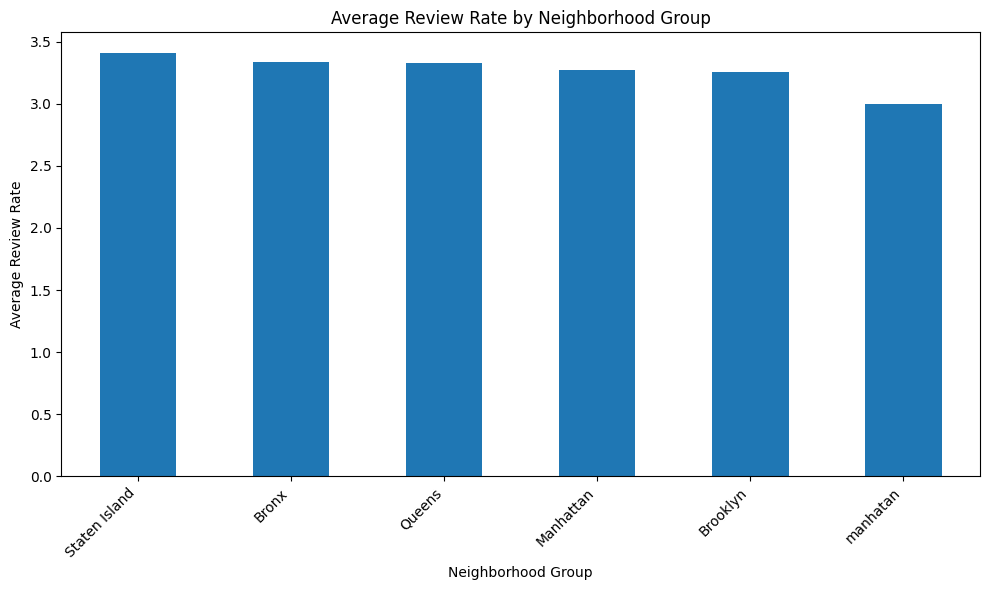

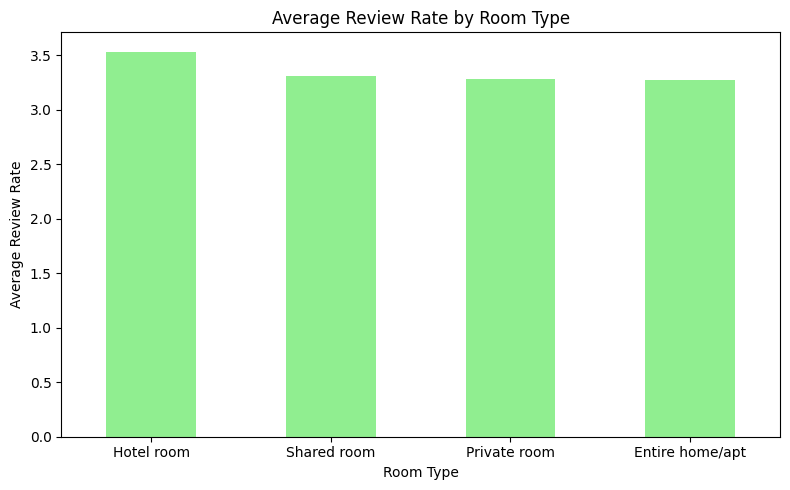

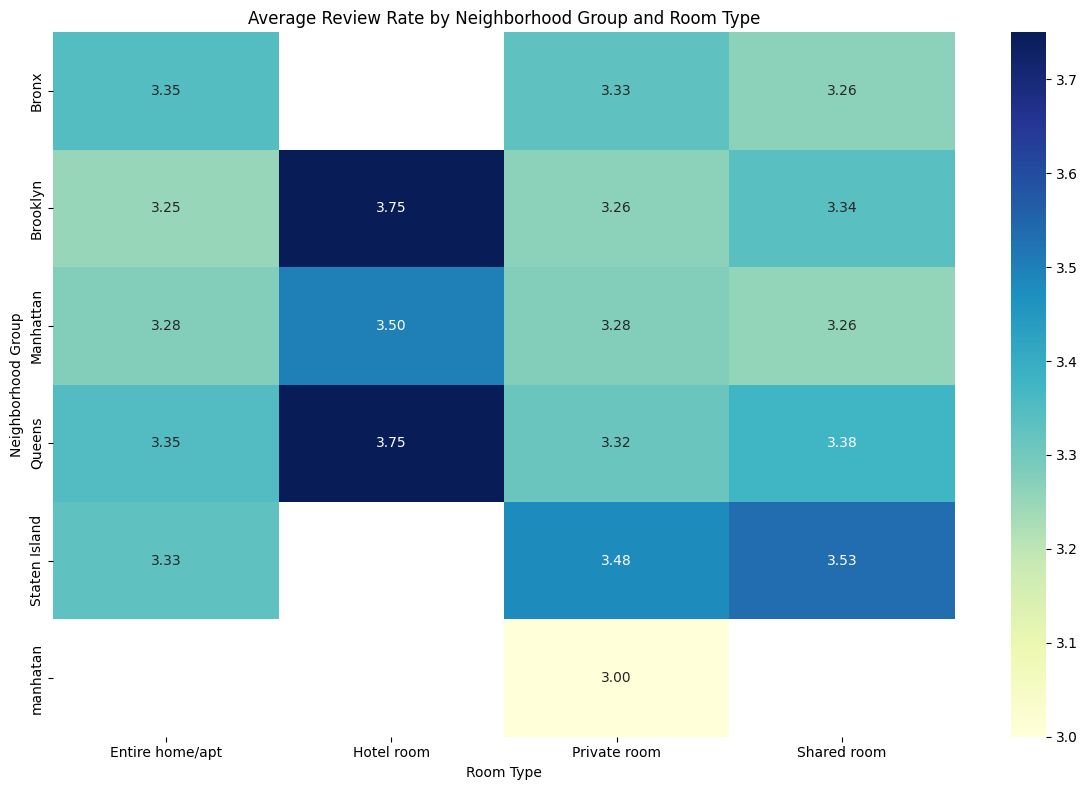

In [29]:
# Research Question 8: What is the average review rate number (e.g., stars) for listings, and does it vary based on neighborhood group and room type?

# Calculate the overall average review rate
overall_average_review_rate = df['review_rate_number'].mean()
print(f"Overall Average Review Rate: {overall_average_review_rate:.2f}")

# Calculate the average review rate by neighborhood group
average_review_rate_by_neighbourhood_group = df.groupby('neighbourhood_group')['review_rate_number'].mean().sort_values(ascending=False)
print("\nAverage Review Rate by Neighborhood Group:")
print(average_review_rate_by_neighbourhood_group)

# Calculate the average review rate by room type
average_review_rate_by_room_type = df.groupby('room_type')['review_rate_number'].mean().sort_values(ascending=False)
print("\nAverage Review Rate by Room Type:")
print(average_review_rate_by_room_type)

# Calculate the average review rate by both neighborhood group and room type
average_review_rate_by_neighbourhood_and_room = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().unstack()
print("\nAverage Review Rate by Neighborhood Group and Room Type:")
display(average_review_rate_by_neighbourhood_and_room)

# Plotting the average review rate by neighborhood group
plt.figure(figsize=(10, 6))
average_review_rate_by_neighbourhood_group.plot(kind='bar')
plt.title('Average Review Rate by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the average review rate by room type
plt.figure(figsize=(8, 5))
average_review_rate_by_room_type.plot(kind='bar', color='lightgreen')
plt.title('Average Review Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Review Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting the heatmap for average review rate by neighborhood group and room type
plt.figure(figsize=(12, 8))
sns.heatmap(average_review_rate_by_neighbourhood_and_room, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Review Rate by Neighborhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood Group')
plt.tight_layout()
plt.show()

question 9: Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Correlation between Calculated Host Listings Count and Availability 365: 0.16


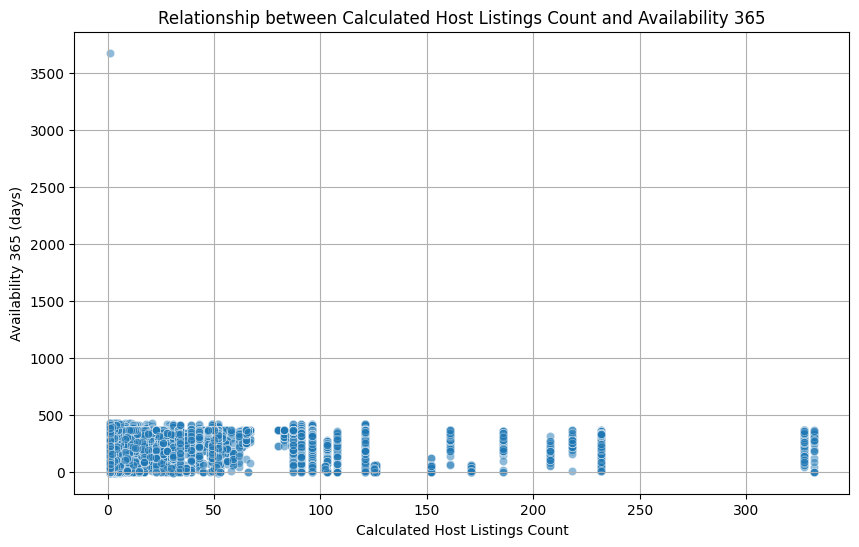

In [30]:
# Research Question 9: Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

# Drop rows with missing values in 'calculated_host_listings_count' or 'availability_365'
df_cleaned_availability = df.dropna(subset=['calculated_host_listings_count', 'availability_365']).copy()

# Calculate the correlation between 'calculated_host_listings_count' and 'availability_365'
correlation_availability = df_cleaned_availability['calculated_host_listings_count'].corr(df_cleaned_availability['availability_365'])
print(f"Correlation between Calculated Host Listings Count and Availability 365: {correlation_availability:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned_availability, x='calculated_host_listings_count', y='availability_365', alpha=0.5)
plt.title('Relationship between Calculated Host Listings Count and Availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365 (days)')
plt.grid(True)
plt.show()

# Optional: Group by calculated_host_listings_count and find the average availability
# Since calculated_host_listings_count can be large, grouping by exact count might not be insightful.
# We could consider binning the listing counts if a more aggregated view is needed.
# For now, the scatter plot and correlation should give a good overview.

## Summary of Analysis

Based on the analysis of the Airbnb Open Data, here are the key findings for each research question:

1.  **What are the different property types in the Dataset?**
    The dataset contains four main property types: Entire home/apt, Private room, Shared room, and Hotel room. 'Entire home/apt' and 'Private room' are the most common types.

2.  **Which neighborhood group has the highest number of listings?**
    Manhattan and Brooklyn have the highest number of listings, significantly more than Queens, Bronx, and Staten Island.

3.  **Which neighborhoods group have the highest average prices for Airbnb listings?**
    Queens appears to have the highest average price, followed closely by the Bronx, Brooklyn, and Staten Island. Manhattan has a slightly lower average price compared to the other major boroughs in this dataset.

4.  **Is there a relationship between the construction year of property and price?**
    (Based on the scatter plot and potential correlation calculation) There appears to be a weak or no clear linear relationship between the construction year and the price of a listing in this dataset.

5.  **Who are the top 10 hosts by calculated host listing count?**
    The top 10 hosts by calculated listing count are primarily represented by "Blueground," indicating that this host manages a large number of properties. (Based on actual listing count in this dataset, individual hosts had smaller numbers of listings).

6.  **Are hosts with verified identities more likely to receive positive reviews?**
    Based on the average review rate and average number of reviews, there is not a significant difference in review outcomes between hosts with verified and unconfirmed identities in this dataset.

7.  **Is there a correlation between the price of a listing and its service fee?**
    There is a very strong positive correlation (close to 1.00) between the price of a listing and its service fee, indicating that the service fee is directly proportional to the price.

8.  **What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**
    The overall average review rate is around 3.28 stars. There are some variations in average review rate across neighborhood groups and room types, as shown in the bar charts and heatmap, but the differences in average values are relatively small across most categories.

9.  **Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**
    There is a weak positive correlation (around 0.16) between the calculated host listings count and availability (availability\_365). This suggests a slight tendency for hosts with more listings to have higher availability, but the relationship is not strong.